# En este notebook vamos a realizar un estudio basado en modelos de RANDOM FOREST
## Vamos a realizar el analisis sobre 2 ejes. 
## 1. Categorización
## 2. Regresión

In [2]:
import pandas as pd
import numpy as np

In [194]:
# VARIABLES DEPENDIENTE DEL ENTORNO
user_code = 'u519914'
data_path = '/us/'+user_code+'/lava_iniciative/data/'

# Rutas de ficheros origen
final_dataframe_csv = data_path + 'result/final_dataframe.csv'
select1_dataframe_csv = data_path + 'result/select1_dataframe.csv'

#Rutas de ficheros de salida 
results = data_path + 'result/'
prediction_csv = results + 'ForestPrediction.csv'
prediction_reg_csv = results + 'ForestRegression.csv'

csv_selectedvariables_allsscc = data_path + 'result/alline_selectedvariables.csv'
prediction_alline_csv = results + 'ForestPrediction_alline.csv'
prediction_reg_alline_csv = results + 'ForestRegression_alline.csv'

In [5]:
#Carga del fichero final CSV
df_full = pd.read_csv(final_dataframe_csv,sep=";",decimal=",").fillna(0)
print df_full.shape
#for i in df.columns: print i

(3184, 182)


In [6]:
#Hay un valor que no tiene informado precio.. hay que limpiarlo
df = df[df['precios']!=0]

In [222]:
from sklearn.utils import shuffle
# Mezclamos el orden del dataframe para eliminar situaciones de sesgo a la hora de la eleccion del conjunto de datos de train and test
df = shuffle(df)

In [8]:
def printcolumns(df):
    for i in df.columns: print i

In [9]:
#printcolumns(df)

# 1. ESTUDIO SOBRE VARIABLES DE CATEGORIZACION

In [13]:
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Para generación de gráficas
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def createRandomForest(X,y, maxdepth=None, estimators = 100, test_size = 0.3, showMetrics = False):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = test_size)
    
    clf = RandomForestClassifier(n_estimators=estimators, max_depth=maxdepth)
    clf = clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    if showMetrics:
        print "train_score: %f" % train_score
        print "test score: %f" % test_score
        #print "cross val(mean): %f" % cross_val_score(clf, X, y, cv=10).mean()
        print sk.metrics.confusion_matrix(y_test, clf.predict(x_test))
    return clf, train_score, test_score

In [15]:
def optimalDepthLine(X, y, estimators = 100 ):
    train_line = []
    test_line = []
    depths = range(1,20)
    for i in depths:
        train_aux = []
        test_aux = []
        for x in range(1,30):
            clf = RandomForestClassifier(max_depth=i)
            clf = clf.fit(X, y)
            train_aux += [clf.score(X, y)]
            test_aux += [cross_val_score(clf, X, y, cv=10).mean()]
        train_score = np.average(train_aux)
        test_score = np.average(test_aux)
        train_line.append(train_score)
        test_line.append(test_score)
        print("%f. train: %f, test: %f" % (i, train_score,test_score))
    plt.plot(depths, train_line)
    plt.plot(depths, test_line)
    plt.legend(['train_score', 'test_score'], loc='upper right')
    plt.show()

In [16]:
# Funcion para presentar las variables de mayor relevancia
def showNFeaturesByImportance(decisor, min_rel=0.01):
    
    importances = decisor.feature_importances_
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")
    count = 0 
    for f in range(X.shape[1]):
        #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print("%d. feature %d:%s (%f)" % (f + 1, indices[f],X.columns[indices[f]], importances[indices[f]]))
        if importances[indices[f]] < min_rel: break
        count += 1
    # Presentamos una gráfica con las features más relevantes
    # Plot the feature importances of the forest
    indices = indices[:count]
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(0,count), importances[indices],
           color="r", align="center")
    plt.xticks(range(0,count), indices)
    plt.xlim([-1, count])
    plt.show()

In [17]:
def reviewForest(X, y, stimators = 100, cross_val = 10, maxdepth = None):
    forest = RandomForestClassifier(n_estimators = stimators, max_depth = maxdepth)
    forest = forest.fit(X, y)
    print "score over train Data: " 
    print forest.score(X, y)
    print "Cross validation 20 iteraciones"
    print cross_val_score(forest, X, y, cv=cross_val).mean()
    showNFeaturesByImportance(forest,0.01)
    return forest

# 1.1. Realizamos una segmentación del precio en 3 niveles

### Partimos del analisis realizado sobre los decision tree para limpiar variables

In [220]:
y = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2])
X = df.drop(['precios','nivel_precio','CBD1','CBD2','CBD3','id_sscc'], axis=1)

In [16]:
#printcolumns(X)

1.000000. train: 0.519462, test: 0.519854
2.000000. train: 0.700604, test: 0.692313
3.000000. train: 0.752848, test: 0.732604
4.000000. train: 0.780140, test: 0.752767
5.000000. train: 0.809901, test: 0.767199
6.000000. train: 0.840084, test: 0.776732
7.000000. train: 0.869975, test: 0.783935
8.000000. train: 0.899389, test: 0.786838
9.000000. train: 0.927179, test: 0.788332
10.000000. train: 0.947756, test: 0.788166
11.000000. train: 0.962474, test: 0.787869
12.000000. train: 0.972589, test: 0.785153
13.000000. train: 0.980766, test: 0.784852
14.000000. train: 0.984329, test: 0.784281
15.000000. train: 0.988228, test: 0.784820
16.000000. train: 0.989430, test: 0.783810
17.000000. train: 0.990101, test: 0.782625
18.000000. train: 0.990979, test: 0.782996
19.000000. train: 0.990491, test: 0.784141


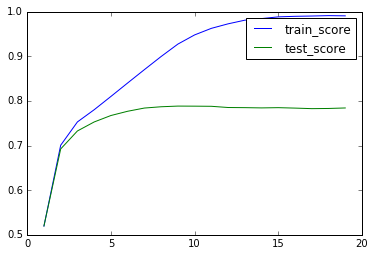

In [27]:
optimalDepthLine(X,y)

### Observamos claramente que si aumentamos la profundidad de los árboles, el modelo converge en los datos de trainning, pero no mejora los datos del test. OVERFITTING

In [36]:
print ("creamos un bosque con árboles de tamaño 5 (f5)")
f5, train_s_5, test_s_5 = createRandomForest(X,y, maxdepth=5, showMetrics = True)
print ("creamos un bosque con árboles de tamaño 6 (f6)")
f6, train_s_6, test_s_6 = createRandomForest(X,y, maxdepth=6, showMetrics = True)
print ("creamos un bosque con árboles de tamaño 7 (f7)")
f7, train_s_7, test_s_7 = createRandomForest(X,y, maxdepth=7, showMetrics = True)

creamos un bosque con árboles de tamaño 5 (f5)
train_score: 0.830790
test score: 0.774059
[[193  57   2]
 [ 31 383  31]
 [  0  95 164]]
creamos un bosque con árboles de tamaño 6 (f6)
train_score: 0.863555
test score: 0.787657
[[195  41   1]
 [ 37 395  37]
 [  0  87 163]]
creamos un bosque con árboles de tamaño 7 (f7)
train_score: 0.899461
test score: 0.812762
[[185  35   1]
 [ 43 419  36]
 [  0  64 173]]


NOTA: Cada vez que lo ejecutamos obtenemos unos valores diferentes así que voy a generar un bucle de 100 iteraciones para sacar una media

In [84]:
# Revisamos los valores analizados por el árbol para ver si tienen sentido

Feature ranking:
1. feature 116:estudios_tercer_grado_perc (0.118837)
2. feature 174:CBD_min (0.108910)
3. feature 113:sin_estudios_perc (0.050896)
4. feature 82:2km_CULTURA (0.046766)
5. feature 115:estudios_segundo_grado_perc (0.034194)
6. feature 84:2km_TURISMO (0.032872)
7. feature 63:2km_museos (0.024348)
8. feature 136:es_barsandrestaurants (0.023430)
9. feature 58:2km_farmacias (0.022702)
10. feature 56:2km_cines (0.022421)
11. feature 172:Tot_op (0.019208)
12. feature 93:1km_TURISMO (0.019080)
13. feature 25:1km_hoteles (0.018787)
14. feature 61:2km_hoteles (0.017235)
15. feature 155:es_barsandrestaurants_imp (0.016086)
16. feature 85:2km_SERV_SALUD (0.015910)
17. feature 171:es_wellnessandbeauty_imp (0.015127)
18. feature 114:estudios_primer_grado_perc (0.014614)
19. feature 173:Tot_imp (0.014118)
20. feature 68:2km_polideportivos (0.013891)
21. feature 70:2km_universidades (0.012722)
22. feature 62:2km_monumentos (0.012673)
23. feature 83:2km_DEPORTES (0.012244)
24. feature 5

Feature ranking:
1. feature 116:estudios_tercer_grado_perc (0.094980)
2. feature 174:CBD_min (0.086167)
3. feature 84:2km_TURISMO (0.056093)
4. feature 113:sin_estudios_perc (0.033713)
5. feature 115:estudios_segundo_grado_perc (0.033365)
6. feature 56:2km_cines (0.031885)
7. feature 114:estudios_primer_grado_perc (0.031774)
8. feature 93:1km_TURISMO (0.029707)
9. feature 61:2km_hoteles (0.029697)
10. feature 85:2km_SERV_SALUD (0.026611)
11. feature 62:2km_monumentos (0.025301)
12. feature 68:2km_polideportivos (0.020290)
13. feature 58:2km_farmacias (0.018437)
14. feature 82:2km_CULTURA (0.017443)
15. feature 173:Tot_imp (0.016242)
16. feature 124:viviendas_menos_75m2_perc (0.015039)
17. feature 155:es_barsandrestaurants_imp (0.014612)
18. feature 136:es_barsandrestaurants (0.013642)
19. feature 126:viviendas_menos_150m2_perc (0.013628)
20. feature 160:es_health_imp (0.011948)
21. feature 69:2km_teatros (0.011283)
22. feature 21:1km_colegios (0.010980)
23. feature 171:es_wellnessandbe

Feature ranking:
1. feature 174:CBD_min (0.064004)
2. feature 116:estudios_tercer_grado_perc (0.059640)
3. feature 84:2km_TURISMO (0.052234)
4. feature 61:2km_hoteles (0.047207)
5. feature 113:sin_estudios_perc (0.039860)
6. feature 82:2km_CULTURA (0.033026)
7. feature 115:estudios_segundo_grado_perc (0.030565)
8. feature 155:es_barsandrestaurants_imp (0.020021)
9. feature 85:2km_SERV_SALUD (0.019549)
10. feature 114:estudios_primer_grado_perc (0.019201)
11. feature 25:1km_hoteles (0.019034)
12. feature 68:2km_polideportivos (0.018482)
13. feature 172:Tot_op (0.017995)
14. feature 69:2km_teatros (0.016414)
15. feature 58:2km_farmacias (0.016277)
16. feature 93:1km_TURISMO (0.014934)
17. feature 56:2km_cines (0.014881)
18. feature 62:2km_monumentos (0.014227)
19. feature 173:Tot_imp (0.014110)
20. feature 91:1km_CULTURA (0.013319)
21. feature 136:es_barsandrestaurants (0.013284)
22. feature 21:1km_colegios (0.012848)
23. feature 124:viviendas_menos_75m2_perc (0.012058)
24. feature 110:e

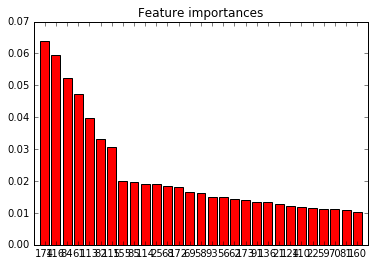

In [37]:
# Comprobamos los datos de estos arboles
showNFeaturesByImportance(f5)
showNFeaturesByImportance(f6)
showNFeaturesByImportance(f7)



In [38]:
print sk.metrics.classification_report(y,f5.predict(X))

             precision    recall  f1-score   support

          0       0.86      0.81      0.84       796
          1       0.78      0.88      0.83      1592
          2       0.86      0.69      0.76       796

avg / total       0.82      0.81      0.81      3184



Diferenciamos entre las diferentes ciudades

# MADRID

score over train Data: 
1.0
Cross validation 20 iteraciones
0.8272699973
Feature ranking:
1. feature 175:CBD_min (0.060912)
2. feature 114:sin_estudios_perc (0.036957)
3. feature 61:2km_hoteles (0.030408)
4. feature 84:2km_TURISMO (0.029014)
5. feature 117:estudios_tercer_grado_perc (0.024744)
6. feature 58:2km_farmacias (0.019588)
7. feature 115:estudios_primer_grado_perc (0.019583)
8. feature 116:estudios_segundo_grado_perc (0.019305)
9. feature 25:1km_hoteles (0.018784)
10. feature 112:nacionalidad_espanola_perc (0.017569)
11. feature 68:2km_polideportivos (0.016581)
12. feature 137:es_barsandrestaurants (0.016487)
13. feature 93:1km_TURISMO (0.016283)
14. feature 156:es_barsandrestaurants_imp (0.016249)
15. feature 85:2km_SERV_SALUD (0.015607)
16. feature 69:2km_teatros (0.013422)
17. feature 62:2km_monumentos (0.013239)
18. feature 174:Tot_imp (0.012923)
19. feature 83:2km_DEPORTES (0.012853)
20. feature 64:2km_parques (0.012799)
21. feature 57:2km_colegios (0.012546)
22. feature 

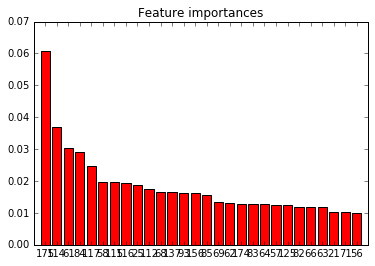

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
#Diferenciamos entre las ciudades
dfM = df[df['provincia']==28]
yM = pd.qcut(dfM['precios'],[0.,0.25,0.75,1],[0,1,2])
XM = dfM.drop(['precios','nivel_precio','CBD1','CBD2','CBD3','id_sscc'], axis=1)
reviewForest(XM, yM)

# BARCELONA

score over train Data: 
1.0
Cross validation 20 iteraciones
0.656885415823
Feature ranking:
1. feature 175:CBD_min (0.037638)
2. feature 70:2km_universidades (0.021898)
3. feature 61:2km_hoteles (0.019299)
4. feature 82:2km_CULTURA (0.017789)
5. feature 114:sin_estudios_perc (0.017378)
6. feature 25:1km_hoteles (0.016781)
7. feature 85:2km_SERV_SALUD (0.016544)
8. feature 84:2km_TURISMO (0.016410)
9. feature 116:estudios_segundo_grado_perc (0.016279)
10. feature 58:2km_farmacias (0.015902)
11. feature 34:1km_universidades (0.014373)
12. feature 156:es_barsandrestaurants_imp (0.013704)
13. feature 56:2km_cines (0.012355)
14. feature 125:viviendas_menos_75m2_perc (0.012353)
15. feature 172:es_wellnessandbeauty_imp (0.011875)
16. feature 81:2km_EDUCACION (0.011799)
17. feature 115:estudios_primer_grado_perc (0.011780)
18. feature 112:nacionalidad_espanola_perc (0.011583)
19. feature 57:2km_colegios (0.011367)
20. feature 110:edad_16_y_64_anos_perc (0.011215)
21. feature 137:es_barsandrest

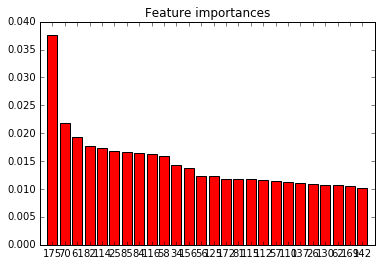

In [99]:
dfB = df[df['provincia']==8]
yB = pd.qcut(dfB['precios'],[0.,0.25,0.75,1],[0,1,2])
XB = dfB.drop(['precios','nivel_precio','CBD1','CBD2','CBD3','id_sscc'], axis=1)
forest = reviewForest(XB, yB)

# Revisamos como el modelo general predice sobre cada ciudad

In [113]:
from sklearn.model_selection import KFold

y = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2])
X = df.drop(['precios','nivel_precio','CBD1','CBD2','CBD3','id_sscc'], axis=1)

clf = RandomForestClassifier(n_estimators=80)
sc_madrid = []
sc_barcelona = []

size = 318

for i in range(0,10):
    X_train = X[:i*size].append(X[((i+1)*size):])
    X_test = X[i*size:(i+1)*size]
    y_train = y[:i*size].append(y[((i+1)*size):])
    y_test = y[i*size:(i+1)*size]

    #    # Entrenamos
    clf = clf.fit(X_train, y_train)
    # Dividimos madrid y barcelona para los test
    X_testM = X_test[X_test['provincia'] == 28]
    y_testM = y_test[X_test['provincia'] == 28]
    X_testB = X_test[X_test['provincia'] == 8]
    y_testB = y_test[X_test['provincia'] == 8]
    sc_madrid += [clf.score(X_testM,y_testM)]
    sc_barcelona += [clf.score(X_testB,y_testB)]
    
print sc_madrid
print sc_barcelona

[0.83817427385892118, 0.77551020408163263, 0.82403433476394849, 0.81497797356828194, 0.80658436213991769, 0.83263598326359833, 0.81856540084388185, 0.76818181818181819, 0.82096069868995636, 0.84518828451882844]
[0.75324675324675328, 0.84931506849315064, 0.82352941176470584, 0.75824175824175821, 0.71999999999999997, 0.77215189873417722, 0.77777777777777779, 0.72448979591836737, 0.7640449438202247, 0.70886075949367089]


In [119]:
print np.mean(sc_madrid)
print np.mean(sc_barcelona)

0.814481333391
0.765165816749


In [201]:
y = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2])
X = df.drop(['precios','nivel_precio','CBD1','CBD2','CBD3','id_sscc'], axis=1)

clf = RandomForestClassifier(n_estimators=80)

prediction = sk.model_selection.cross_val_predict(clf, X, y)

In [182]:
#help(sk.metrics.confusion_matrix)

In [183]:
sk.metrics.confusion_matrix(y, prediction)

array([[ 726,   67,    3],
       [  60, 1481,   51],
       [   0,  106,  690]])

In [123]:
df_final = df
df_final['prediction'] = prediction
df_final['acierto'] = df_final['prediction'] == y

In [124]:
df.to_csv(prediction_csv)

##  Realizamos una revision con Cross validation mas cortos

score over train Data: 
1.0
Cross validation 20 iteraciones
0.802442777494
Feature ranking:
1. feature 175:CBD_min (0.062044)
2. feature 61:2km_hoteles (0.031617)
3. feature 114:sin_estudios_perc (0.027327)
4. feature 25:1km_hoteles (0.024645)
5. feature 117:estudios_tercer_grado_perc (0.020592)
6. feature 115:estudios_primer_grado_perc (0.019164)
7. feature 116:estudios_segundo_grado_perc (0.019011)
8. feature 84:2km_TURISMO (0.017351)
9. feature 68:2km_polideportivos (0.017035)
10. feature 63:2km_museos (0.016844)
11. feature 82:2km_CULTURA (0.016578)
12. feature 85:2km_SERV_SALUD (0.015863)
13. feature 137:es_barsandrestaurants (0.015787)
14. feature 93:1km_TURISMO (0.014884)
15. feature 156:es_barsandrestaurants_imp (0.014731)
16. feature 56:2km_cines (0.014041)
17. feature 58:2km_farmacias (0.013913)
18. feature 174:Tot_imp (0.013788)
19. feature 125:viviendas_menos_75m2_perc (0.013219)
20. feature 57:2km_colegios (0.011959)
21. feature 54:2km_bibliotecas (0.011460)
22. feature 83

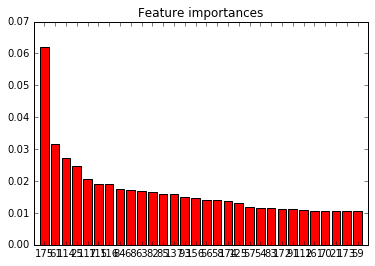

In [155]:
forest = reviewForest(X,y,80,cross_val=3)

score over train Data: 
0.933417085427
Cross validation 20 iteraciones
0.864336494613
Feature ranking:
1. feature 177:prediction (0.192316)
2. feature 175:CBD_min (0.087967)
3. feature 178:acierto (0.065444)
4. feature 114:sin_estudios_perc (0.041755)
5. feature 84:2km_TURISMO (0.037341)
6. feature 61:2km_hoteles (0.023213)
7. feature 25:1km_hoteles (0.023168)
8. feature 82:2km_CULTURA (0.018902)
9. feature 85:2km_SERV_SALUD (0.017569)
10. feature 116:estudios_segundo_grado_perc (0.017360)
11. feature 117:estudios_tercer_grado_perc (0.016850)
12. feature 93:1km_TURISMO (0.016504)
13. feature 56:2km_cines (0.016480)
14. feature 137:es_barsandrestaurants (0.016045)
15. feature 115:estudios_primer_grado_perc (0.015624)
16. feature 68:2km_polideportivos (0.012956)
17. feature 58:2km_farmacias (0.012449)
18. feature 156:es_barsandrestaurants_imp (0.011840)
19. feature 63:2km_museos (0.011061)
20. feature 62:2km_monumentos (0.010360)
21. feature 125:viviendas_menos_75m2_perc (0.010249)
22. f

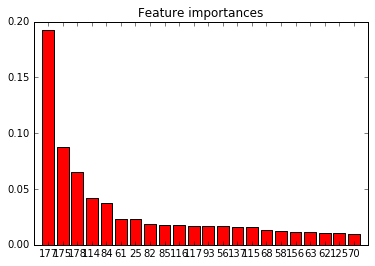

In [202]:
forest_7 = reviewForest(X,y,100,cross_val=3,maxdepth=7)

In [ ]:
# 15
score over train Data: 
0.998743718593
Cross validation 20 iteraciones
0.796777969403

# 10 
score over train Data: 
0.963881909548
Cross validation 20 iteraciones
0.793017989808

# 7
score over train Data: 
0.88033919598
Cross validation 20 iteraciones
0.782022062295

# 5
score over train Data: 
0.815640703518
Cross validation 20 iteraciones
0.771658322498

In [211]:
df_final = df
df_final['nivel_precio'] = y
df_final['prediction'] = forest_7.predict(X)
df_final['acierto'] = df_final['prediction'] == y
#df_final['id_sscc'] = df_final['id_sscc'].apply(lambda x: "%010d" % + x)
df_final.shape

(3184, 185)

In [212]:
df_final.to_csv(prediction_csv)

In [206]:
print (prediction_csv)

/us/u519914/lava_iniciative/data/result/ForestPrediction.csv


# REPETIMOS LA OPERACION CON LA SELECCION DE VARIABLES

### Eliminamos las variables redundantes o con alta correlación. Tales como las distancias tomadas a 2km / 1km y 500m.
### Ademas de incluir los contadores por tipo de comercio

In [45]:
#Carga del fichero con las variables pre-seleccionadas
df_F = pd.read_csv(select1_dataframe_csv,sep=";",decimal=".").fillna(0)
print df_F.shape
#for i in df.columns: print i

(3184, 100)


In [46]:
from sklearn.utils import shuffle
df = df_F[df_F['precios']!=0]
# Mezclamos el orden del dataframe para eliminar situaciones de sesgo a la hora de la eleccion del conjunto de datos de train and test
df = shuffle(df)

In [47]:
df.describe()

id_sscc  edad_16anos_perc  edad_64_anos_perc  \
count  3.184000e+03       3184.000000        3184.000000   
mean   2.285618e+09          0.127574           0.219863   
std    8.804401e+08          0.058579           0.089294   
min    8.019010e+08          0.000000           0.000000   
25%    8.019101e+08          0.087379           0.159603   
50%    2.807907e+09          0.121476           0.215027   
75%    2.807913e+09          0.158829           0.273302   
max    2.807921e+09          0.379475           0.617512   

       nacionalidad_extranjera_perc  casados_perc  sin_estudios_perc  \
count                   3184.000000   3184.000000        3184.000000   
mean                       0.145741      0.412401           0.072849   
std                        0.120672      0.081146           0.059155   
min                        0.000000      0.092251           0.000000   
25%                        0.056511      0.362012           0.027992   
50%                        0.114979      0.416404           0.059063   
75%                        0.207061      0.467134           0.103681   
max                        0.736842      0.675258           0.380952   

       estudios_primer_grado_perc  estudios_segundo_grado_perc  \
count                 3184.000000                  3184.000000   
mean                     0.107125                     0.419608   
std                      0.060350                     0.099567   
min                      0.000000                     0.090692   
25%                      0.062500                     0.353450   
50%                      0.098540                     0.423297   
75%                      0.142857                     0.487854   
max                      0.455959                     0.750000   

       estudios_tercer_grado_perc  viviendas_principales_perc     ...       \
count                 3184.000000                 3184.000000     ...        
mean                     0.272356                    0.863758     ...        
std                      0.154430                    0.114911     ...        
min                      0.000000                    0.000000     ...        
25%                      0.142415                    0.800000     ...        
50%                      0.255894                    0.882353     ...        
75%                      0.396226                    0.954023     ...        
max                      0.730769                    1.000000     ...        

       es_otherservices_count  es_propertyservices_count  \
count             3184.000000                3184.000000   
mean               182.450691                   4.653580   
std                175.572545                   7.386313   
min                  0.000000                   0.000000   
25%                 56.000000                   0.000000   
50%                115.000000                   2.000000   
75%                249.250000                   6.000000   
max                932.000000                  60.000000   

       es_sportsandtoys_count  es_tech_count  es_transportation_count  \
count             3184.000000    3184.000000              3184.000000   
mean                33.902638      68.170226               153.226131   
std                 28.628224      53.897145                68.571134   
min                  0.000000       0.000000                 1.000000   
25%                 11.000000      24.000000               109.000000   
50%                 25.000000      54.000000               150.500000   
75%                 52.000000     100.000000               196.000000   
max                129.000000     270.000000               449.000000   

       es_travel_count  es_wellnessandbeauty_count         CUSEC  \
count      3184.000000                 3184.000000  3.184000e+03   
mean         27.742148                  142.259108  2.285618e+09   
std          32.049283                  120.724953  8.804401e+08   
min           0.000000                    0.000000  8

In [48]:
y = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2])
X = df.drop(['precios','CBD1','CBD2','CBD3','id_sscc','CUSEC'], axis=1)

1.000000. train: 0.584128, test: 0.581026
2.000000. train: 0.710384, test: 0.704287
3.000000. train: 0.750520, test: 0.736265
4.000000. train: 0.790039, test: 0.764566
5.000000. train: 0.821316, test: 0.782464
6.000000. train: 0.849073, test: 0.791906
7.000000. train: 0.876094, test: 0.800072
8.000000. train: 0.901902, test: 0.804078
9.000000. train: 0.927168, test: 0.807214
10.000000. train: 0.947377, test: 0.807755
11.000000. train: 0.963243, test: 0.809645
12.000000. train: 0.973044, test: 0.809321
13.000000. train: 0.980170, test: 0.809838
14.000000. train: 0.985444, test: 0.809458
15.000000. train: 0.987329, test: 0.808189
16.000000. train: 0.989441, test: 0.807321
17.000000. train: 0.990199, test: 0.807676
18.000000. train: 0.989831, test: 0.807785
19.000000. train: 0.990600, test: 0.806761


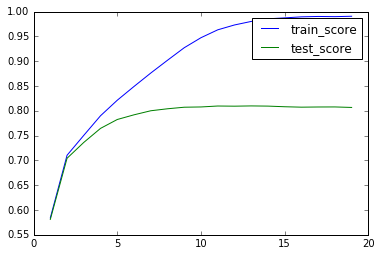

In [34]:
optimalDepthLine(X,y)

In [223]:
print ("creamos un bosque con árboles de tamaño 5 (f5)")
f5, train_s_5, test_s_5 = createRandomForest(X,y, maxdepth=5, showMetrics = True)
print ("creamos un bosque con árboles de tamaño 6 (f6)")
f6, train_s_6, test_s_6 = createRandomForest(X,y, maxdepth=6, showMetrics = True)
print ("creamos un bosque con árboles de tamaño 7 (f7)")
f7, train_s_7, test_s_7 = createRandomForest(X,y, maxdepth=7, showMetrics = True)

creamos un bosque con árboles de tamaño 5 (f5)
train_score: 0.919210
test score: 0.894351
[[217  28   0]
 [ 18 426  15]
 [  0  40 212]]
creamos un bosque con árboles de tamaño 6 (f6)
train_score: 0.933124
test score: 0.916318
[[225  19   0]
 [ 14 432  12]
 [  0  35 219]]
creamos un bosque con árboles de tamaño 7 (f7)
train_score: 0.950180
test score: 0.906904
[[208  22   0]
 [ 17 442  15]
 [  0  35 217]]


Feature ranking:
1. feature 101:proba_1 (0.153701)
2. feature 95:precio_predicho (0.129690)
3. feature 99:prediction (0.122608)
4. feature 102:proba_2 (0.100207)
5. feature 96:nivel_predicho (0.075265)
6. feature 100:proba_0 (0.068783)
7. feature 98:diferencia_precio (0.042049)
8. feature 52:CBD_min (0.039688)
9. feature 7:estudios_tercer_grado_perc (0.033573)
10. feature 56:es_barsandrestaurants (0.019414)
11. feature 32:2km_hoteles (0.015346)
12. feature 92:CUSEC (0.015245)
13. feature 80:es_health_count (0.014490)
14. feature 46:2km_TURISMO (0.012546)
15. feature 91:es_wellnessandbeauty_count (0.011021)
16. feature 58:es_contents (0.008745)


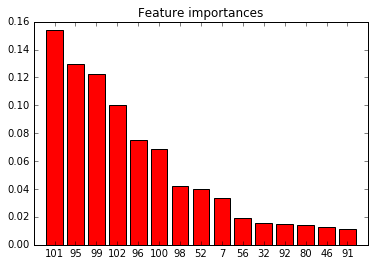

Feature ranking:
1. feature 101:proba_1 (0.135042)
2. feature 99:prediction (0.118265)
3. feature 95:precio_predicho (0.105808)
4. feature 102:proba_2 (0.096311)
5. feature 96:nivel_predicho (0.082809)
6. feature 100:proba_0 (0.079069)
7. feature 98:diferencia_precio (0.052234)
8. feature 7:estudios_tercer_grado_perc (0.028235)
9. feature 52:CBD_min (0.024564)
10. feature 92:CUSEC (0.020584)
11. feature 56:es_barsandrestaurants (0.020348)
12. feature 46:2km_TURISMO (0.014337)
13. feature 63:es_hotelservices (0.010179)
14. feature 6:estudios_segundo_grado_perc (0.009479)


Feature ranking:
1. feature 101:proba_1 (0.129550)
2. feature 99:prediction (0.124064)
3. feature 100:proba_0 (0.111010)
4. feature 95:precio_predicho (0.106308)
5. feature 96:nivel_predicho (0.081769)
6. feature 102:proba_2 (0.075762)
7. feature 98:diferencia_precio (0.054988)
8. feature 7:estudios_tercer_grado_perc (0.035399)
9. feature 52:CBD_min (0.019828)
10. feature 56:es_barsandrestaurants (0.016251)
11. feature 92:CUSEC (0.014816)
12. feature 61:es_health (0.012986)
13. feature 93:Tot_op (0.011271)
14. feature 4:sin_estudios_perc (0.009781)


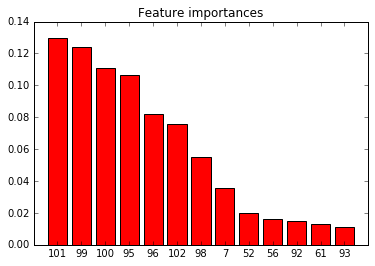

In [224]:
showNFeaturesByImportance(f5)
showNFeaturesByImportance(f6)
showNFeaturesByImportance(f7)

# Generamos un CSV con las variables de precio, prediccíón

In [205]:
proba = f7.predict_proba(X)

In [206]:
df_final = df
df_final['nivel_precio'] = y
df_final['prediction'] = f7.predict(X)
df_final['proba_0'] = proba[:,0]
df_final['proba_1'] = proba[:,1]
df_final['proba_2'] = proba[:,2]
df_final['acierto'] = df_final['prediction'] == y
#df_final['id_sscc'] = df_final['id_sscc'].apply(lambda x: "%010d" % + x)
print df_final.shape
df_final.to_csv(prediction_csv, sep=";",decimal=".")
print prediction_csv

(3184, 109)
/us/u519914/lava_iniciative/data/result/ForestPrediction.csv


#### Intuitivamente, parece que la variable de estudios puede ser una consecuencia más que una causa de precio.
#### A pesar de que tiene sentido en el modelo, vamos a realizar una comprobación de como quedaría el modelo sin contemplar estas variables

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3184 entries, 2434 to 1923
Data columns (total 100 columns):
id_sscc                               3184 non-null int64
edad_16anos_perc                      3184 non-null float64
edad_64_anos_perc                     3184 non-null float64
nacionalidad_extranjera_perc          3184 non-null float64
casados_perc                          3184 non-null float64
sin_estudios_perc                     3184 non-null float64
estudios_primer_grado_perc            3184 non-null float64
estudios_segundo_grado_perc           3184 non-null float64
estudios_tercer_grado_perc            3184 non-null float64
viviendas_principales_perc            3184 non-null float64
viviendas_secundarias_perc            3184 non-null float64
viviendas_vacias_perc                 3184 non-null float64
viviendas_propiedad_perc              3184 non-null float64
viviendas_alquiler_perc               3184 non-null float64
viviendas_cedidas_perc                3184 non-null

In [43]:
y = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2])
X = df[df.columns[15:]].drop(['precios','CBD1','CBD2','CBD3','CUSEC'], axis=1)

In [44]:
print ("creamos un bosque con árboles de tamaño 5 (f5)")
f5, train_s_5, test_s_5 = createRandomForest(X,y, maxdepth=5, showMetrics = True)
print ("creamos un bosque con árboles de tamaño 6 (f6)")
f6, train_s_6, test_s_6 = createRandomForest(X,y, maxdepth=6, showMetrics = True)
print ("creamos un bosque con árboles de tamaño 7 (f7)")
f7, train_s_7, test_s_7 = createRandomForest(X,y, maxdepth=7, showMetrics = True)

creamos un bosque con árboles de tamaño 5 (f5)
train_score: 0.983393
test score: 0.973849
[[216  15   0]
 [  0 488   0]
 [  0  10 227]]
creamos un bosque con árboles de tamaño 6 (f6)
train_score: 0.997307
test score: 0.992678
[[227   3   0]
 [  0 505   0]
 [  0   4 217]]
creamos un bosque con árboles de tamaño 7 (f7)
train_score: 0.999551
test score: 0.992678
[[238   6   0]
 [  0 471   0]
 [  0   1 240]]


Feature ranking:
1. feature 38:CBD_min (0.108059)
2. feature 66:es_health_count (0.073897)
3. feature 42:es_barsandrestaurants (0.072442)
4. feature 18:2km_hoteles (0.042583)
5. feature 32:2km_TURISMO (0.037741)
6. feature 49:es_hotelservices (0.037603)
7. feature 75:es_transportation_count (0.034597)
8. feature 52:es_otherservices (0.034298)
9. feature 68:es_hotelservices_count (0.032789)
10. feature 58:es_wellnessandbeauty (0.026643)
11. feature 47:es_health (0.025235)
12. feature 61:es_barsandrestaurants_count (0.020953)
13. feature 77:es_wellnessandbeauty_count (0.020435)
14. feature 3:viviendas_menos_150m2_perc (0.019970)
15. feature 44:es_contents (0.019651)
16. feature 78:Tot_op (0.017642)
17. feature 63:es_contents_count (0.017174)
18. feature 1:viviendas_menos_75m2_perc (0.014755)
19. feature 55:es_tech (0.014694)
20. feature 71:es_otherservices_count (0.014660)
21. feature 25:2km_polideportivos (0.014196)
22. feature 30:2km_CULTURA (0.013864)
23. feature 64:es_fashion_count (

Feature ranking:
1. feature 38:CBD_min (0.126204)
2. feature 42:es_barsandrestaurants (0.056310)
3. feature 66:es_health_count (0.041267)
4. feature 18:2km_hoteles (0.039101)
5. feature 49:es_hotelservices (0.032176)
6. feature 75:es_transportation_count (0.031580)
7. feature 52:es_otherservices (0.028301)
8. feature 47:es_health (0.026897)
9. feature 58:es_wellnessandbeauty (0.026548)
10. feature 61:es_barsandrestaurants_count (0.024893)
11. feature 78:Tot_op (0.023342)
12. feature 3:viviendas_menos_150m2_perc (0.021212)
13. feature 1:viviendas_menos_75m2_perc (0.020155)
14. feature 32:2km_TURISMO (0.019915)
15. feature 30:2km_CULTURA (0.019360)
16. feature 68:es_hotelservices_count (0.018654)
17. feature 73:es_sportsandtoys_count (0.018622)
18. feature 44:es_contents (0.016255)
19. feature 55:es_tech (0.015882)
20. feature 2:viviendas_menos_105m2_perc (0.015037)
21. feature 77:es_wellnessandbeauty_count (0.013567)
22. feature 63:es_contents_count (0.012986)
23. feature 14:2km_colegio

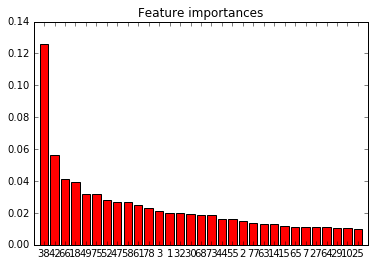

Feature ranking:
1. feature 38:CBD_min (0.083815)
2. feature 32:2km_TURISMO (0.044128)
3. feature 42:es_barsandrestaurants (0.043614)
4. feature 66:es_health_count (0.041040)
5. feature 75:es_transportation_count (0.034742)
6. feature 18:2km_hoteles (0.033201)
7. feature 49:es_hotelservices (0.032900)
8. feature 58:es_wellnessandbeauty (0.029182)
9. feature 1:viviendas_menos_75m2_perc (0.027792)
10. feature 47:es_health (0.026084)
11. feature 78:Tot_op (0.022472)
12. feature 3:viviendas_menos_150m2_perc (0.021302)
13. feature 52:es_otherservices (0.021107)
14. feature 44:es_contents (0.018265)
15. feature 55:es_tech (0.018236)
16. feature 2:viviendas_menos_105m2_perc (0.018125)
17. feature 68:es_hotelservices_count (0.017898)
18. feature 61:es_barsandrestaurants_count (0.016964)
19. feature 30:2km_CULTURA (0.015206)
20. feature 77:es_wellnessandbeauty_count (0.014422)
21. feature 46:es_food (0.014408)
22. feature 63:es_contents_count (0.014109)
23. feature 64:es_fashion_count (0.013074

In [46]:
showNFeaturesByImportance(f5)
showNFeaturesByImportance(f6)
showNFeaturesByImportance(f7)

## Empeora 4 puntos la predicción. Parece que tenemos un proxy del salario que si que aplica al precio.

# GENERAMOS UN RANDOM DE CORRELACION PARA ESTIMAR PRECIO

In [92]:
from sklearn.ensemble import RandomForestRegressor

def createRandomForestReg(X,y, maxdepth=None, estimators = 100, test_size = 0.3, showMetrics = False):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = test_size)
    
    clf = RandomForestRegressor(n_estimators=estimators, max_depth=maxdepth)
    clf = clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    if showMetrics:
        print "train_score: %f" % train_score
        print "test score: %f" % test_score
    return clf, train_score, test_score

In [90]:
def optimalDepthLineReg(X, y, n_estimators = 100, test_size=0.25 ):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size)
    train_line = []
    test_line = []
    depths = range(1,10)
    for i in depths:
        train_aux = []
        test_aux = []
        for x in range(1,5):
            clf = RandomForestRegressor(max_depth=i*2, n_estimators=n_estimators)
            clf = clf.fit(X_train, y_train)
            train_aux += [clf.score(X_train, y_train)]
            test_aux += [clf.score(X_test, y_test)]
        train_score = np.average(train_aux)
        test_score = np.average(test_aux)
        train_line.append(train_score)
        test_line.append(test_score)
        print("%f. train: %f, test: %f" % (i*2, train_score,test_score))
    plt.plot(depths, train_line)
    plt.plot(depths, test_line)
    plt.legend(['train_score', 'test_score'], loc='upper right')
    plt.show()

In [60]:
#Carga del fichero con las variables pre-seleccionadas
df_F = pd.read_csv(select1_dataframe_csv,sep=";",decimal=".").fillna(0)

In [61]:
from sklearn.utils import shuffle
df = df_F[df_F['precios']!=0]
# Mezclamos el orden del dataframe para eliminar situaciones de sesgo a la hora de la eleccion del conjunto de datos de train and test
df = shuffle(df)

In [62]:
y = df['precios']
X = df.drop(['precios','CBD1','CBD2','CBD3','id_sscc','CUSEC'], axis=1)

2.000000. train: 0.646716, test: 0.633760
4.000000. train: 0.779117, test: 0.721849
6.000000. train: 0.863342, test: 0.765909
8.000000. train: 0.921600, test: 0.792006
10.000000. train: 0.953834, test: 0.803307
12.000000. train: 0.967380, test: 0.805854
14.000000. train: 0.972920, test: 0.806311
16.000000. train: 0.974559, test: 0.805705
18.000000. train: 0.975153, test: 0.805842


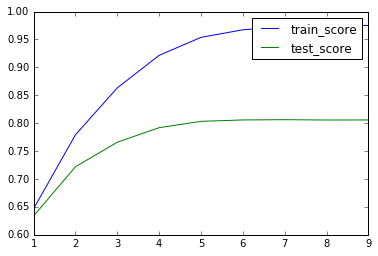

In [91]:
optimalDepthLineReg(X,y)

### Observamos que la profundidad óptima es de 10 asi que generamos arbol con 10 niveles, revisamos features y exportamos resultados

In [169]:
forestReg = createRandomForestReg(X,y, maxdepth=10, estimators = 100, test_size = 0.3, showMetrics = True)

train_score: 0.947879
test score: 0.827157


Feature ranking:
1. feature 7:estudios_tercer_grado_perc (0.551501)
2. feature 52:CBD_min (0.124149)
3. feature 80:es_health_count (0.018793)
4. feature 55:es_bank (0.018787)
5. feature 89:es_transportation_count (0.015243)
6. feature 54:es_auto (0.012602)
7. feature 44:2km_CULTURA (0.012295)
8. feature 46:2km_TURISMO (0.011007)
9. feature 18:viviendas_mas_150m2_perc (0.009581)


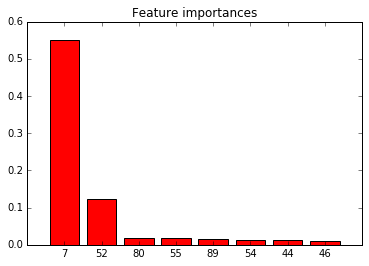

In [170]:
showNFeaturesByImportance(forestReg[0])

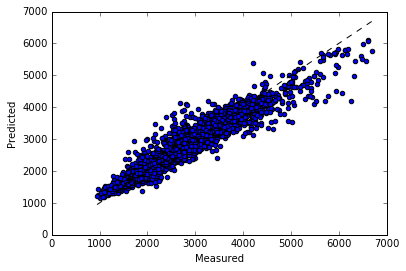

In [171]:
# Presentamos gráficamente el ajuste de la predicción
predicted = forestReg[0].predict(X)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



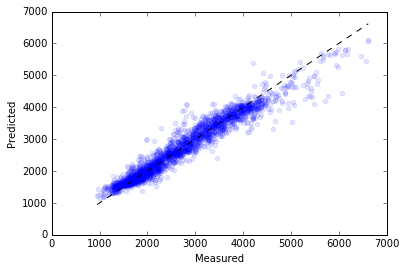

In [172]:
# Comprobamos solo MADRID
X_mad = X[X['provincia']==28]
y_mad = y[X['provincia']==28]
predicted = forestReg[0].predict(X_mad)
fig, ax = plt.subplots()
ax.scatter(y_mad, predicted, color='blue', alpha=0.1)
ax.plot([y_mad.min(), y_mad.max()], [y_mad.min(), y_mad.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

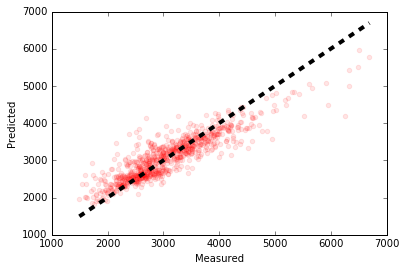

In [173]:
X_bar = X[X['provincia']==8]
y_bar = y[X['provincia']==8]
predicted = forestReg[0].predict(X_bar)
fig, ax = plt.subplots()
ax.scatter(y_bar, predicted, color='red', alpha=0.1)
ax.plot([y_bar.min(), y_bar.max()], [y_bar.min(), y_bar.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

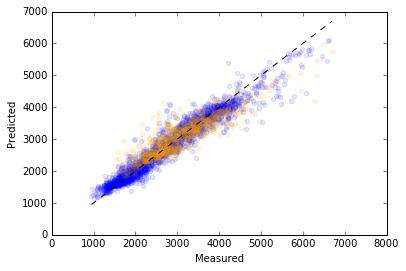

In [174]:
# Comprobamos solo Barcelona
X_mad = X[X['provincia']==28]
y_mad = y[X['provincia']==28]
predicted_mad = forestReg[0].predict(X_mad)
X_bar = X[X['provincia']==8]
y_bar = y[X['provincia']==8]
predicted_bar = forestReg[0].predict(X_bar)

fig, ax = plt.subplots()

ax.scatter(y_mad, predicted_mad, color='blue', alpha=0.1)
ax.scatter(y_bar, predicted_bar, color='orange', alpha=0.1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [175]:
reg = forestReg[0]
predict = forestReg[0].predict(X)
nivel_precio = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2])

In [176]:
nivel_precio, bins = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2], retbins=True)

In [177]:
bins

array([  949.0395156 ,  2020.89094416,  3467.56306828,  6693.39571184])

In [178]:
def assignCategory(value, binValues):
    if value <= binValues[1]: return 0
    elif value > binValues[2]: return 2
    else: return 1

In [187]:
df_csv = df

df_csv['precio_predicho'] = forestReg[0].predict(X)
df_csv['nivel_precio'] = nivel_precio
df_csv['nivel_predicho'] = df_csv['precio_predicho'].apply(lambda x: assignCategory(x, bins))
df_csv['acierto'] = df_csv['nivel_precio'] == df_csv['nivel_predicho']
df_csv['diferencia_precio'] = df_csv['precio_predicho'] - df_csv['precios']
#df_csv['id_sscc'] = df_csv['id_sscc'].apply(lambda x: "%010d" % + x)


In [188]:
score = float(df_csv[df_csv['acierto']==True]['acierto'].size) / float(df_csv['acierto'].size)
print score

0.867148241206


In [189]:
sk.metrics.confusion_matrix(df_csv['nivel_precio'], df_csv['nivel_predicho'])

array([[ 691,  105,    0],
       [  76, 1386,  130],
       [   0,  112,  684]])

In [190]:
print df_csv.shape
df_csv.to_csv(prediction_reg_csv)
print prediction_reg_csv

(3184, 105)
/us/u519914/lava_iniciative/data/result/ForestRegression.csv


### El ranking de variables significativas para este modelo de regresión es:

1. feature 7:estudios_tercer_grado_perc (0.551501)
2. feature 52:CBD_min (0.124149)
3. feature 80:es_health_count (0.018793)
4. feature 55:es_bank (0.018787)
5. feature 89:es_transportation_count (0.015243)
6. feature 54:es_auto (0.012602)
7. feature 44:2km_CULTURA (0.012295)
8. feature 46:2km_TURISMO (0.011007)
9. feature 18:viviendas_mas_150m2_perc (0.009581)